In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
    
plt.rc('axes', unicode_minus=False) 

In [138]:
# 분석주제 : 레드팀/블루팀의 위치상 오브젝트를 얻기 쉬울까 ? 오브젝트가 승리에 미치는 영향은?

df0=pd.read_csv('Challenger_Ranked_Games.csv', encoding='cp949')
df1=pd.read_csv('Master_Ranked_Games.csv',encoding='cp949')
df00=pd.read_csv('GrandMaster_Ranked_Games.csv', encoding='cp949')

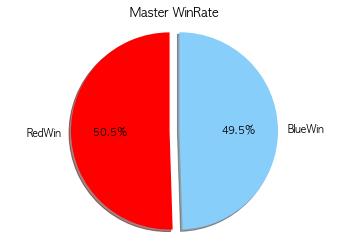

마스터 레드팀 승리 : 54084
마스터 블루팀 승리 : 53041


In [71]:
#마스터 레드, 블루팀 승률 pie 차트

labels = ['RedWin','BlueWin']
sizes = [50.5, 49.5]
colors = ['red', 'lightskyblue']
explode = (0.1, 0)
plt.title("Master WinRate")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

print('마스터 레드팀 승리 :',df.redWins[df.redWins==1].sum())
print('마스터 블루팀 승리 :',df.blueWins[df.blueWins==1].sum())

그랜드 마스터 레드팀 승리 : 16772
그랜드 마스터 블루팀 승리 : 16060


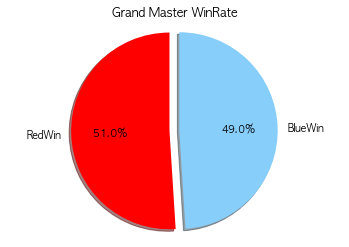

In [72]:
#그랜드마스터 레드, 블루팀 승률 pie 차트

labels = ['RedWin','BlueWin']
sizes = [51, 49]
colors = ['red', 'lightskyblue']
explode = (0.1, 0)
plt.title("Grand Master WinRate")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show


print('그랜드 마스터 레드팀 승리 :',df01.redWins[df.redWins==1].sum())
print('그랜드 마스터 블루팀 승리 :',df01.blueWins[df.blueWins==1].sum())

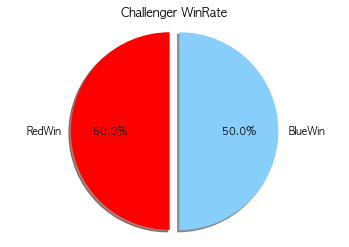

첼린저 레드팀 승리 : 13450
첼린저 블루팀 승리 : 13454


In [73]:
#첼린저 레드, 블루팀 승률 pie 차트

labels = ['RedWin','BlueWin']
sizes = [50, 50]
colors = ['red', 'lightskyblue']
explode = (0.1, 0)
plt.title("Challenger WinRate")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()


print('첼린저 레드팀 승리 :',df1.redWins[df1.redWins==1].sum())
print('첼린저 블루팀 승리 :',df1.blueWins[df1.blueWins==1].sum())

In [120]:
#오브젝트결론 = 레드팀 우위 (첼린저, 그랜드마스터, 마스터 모두 래드팀 우위)
#드래곤입구-> 레드 우위, 바론입구-> 블루 우위

#드래곤 처치수 = 레드 > 블루
print('레드팀 드래곤 킬 수 : ',df1.redDragonKills[df1.redDragonKills].sum())
print('블루팀 드래곤 킬 수 : ',df1.blueDragonKills[df1.blueDragonKills].sum())

#바론 처치수 = 레드 > 블루    -> 레드팀이 용을 먹고 능력치를 얻어 한타를 대승으로 거둔 후에 바론을 먹는 경우가 많음

print('레드팀 첫 바론 킬 수 : ',df1.redFirstBaron.sum())
print('블루팀 첫 바론 킬 수 : ',df1.blueFirstBaron.sum())
print('레드팀 바론 킬 수 : ',df1.redBaronKills[df1.redBaronKills].sum())
print('블루팀 바론 킬 수 : ',df1.blueBaronKills[df1.blueBaronKills].sum())

레드팀 드래곤 킬 수 :  150171
블루팀 드래곤 킬 수 :  72606
레드팀 첫 바론 킬 수 :  16925
블루팀 첫 바론 킬 수 :  15446
레드팀 바론 킬 수 :  63216
블루팀 바론 킬 수 :  51024


In [75]:
df1.info()

#blueInhibitorKills = 억제기제거 횟수
#WardPlaced = 와드 설치 횟수
#KillingSpree = 연속킬 횟수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [76]:
df1.head(5)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


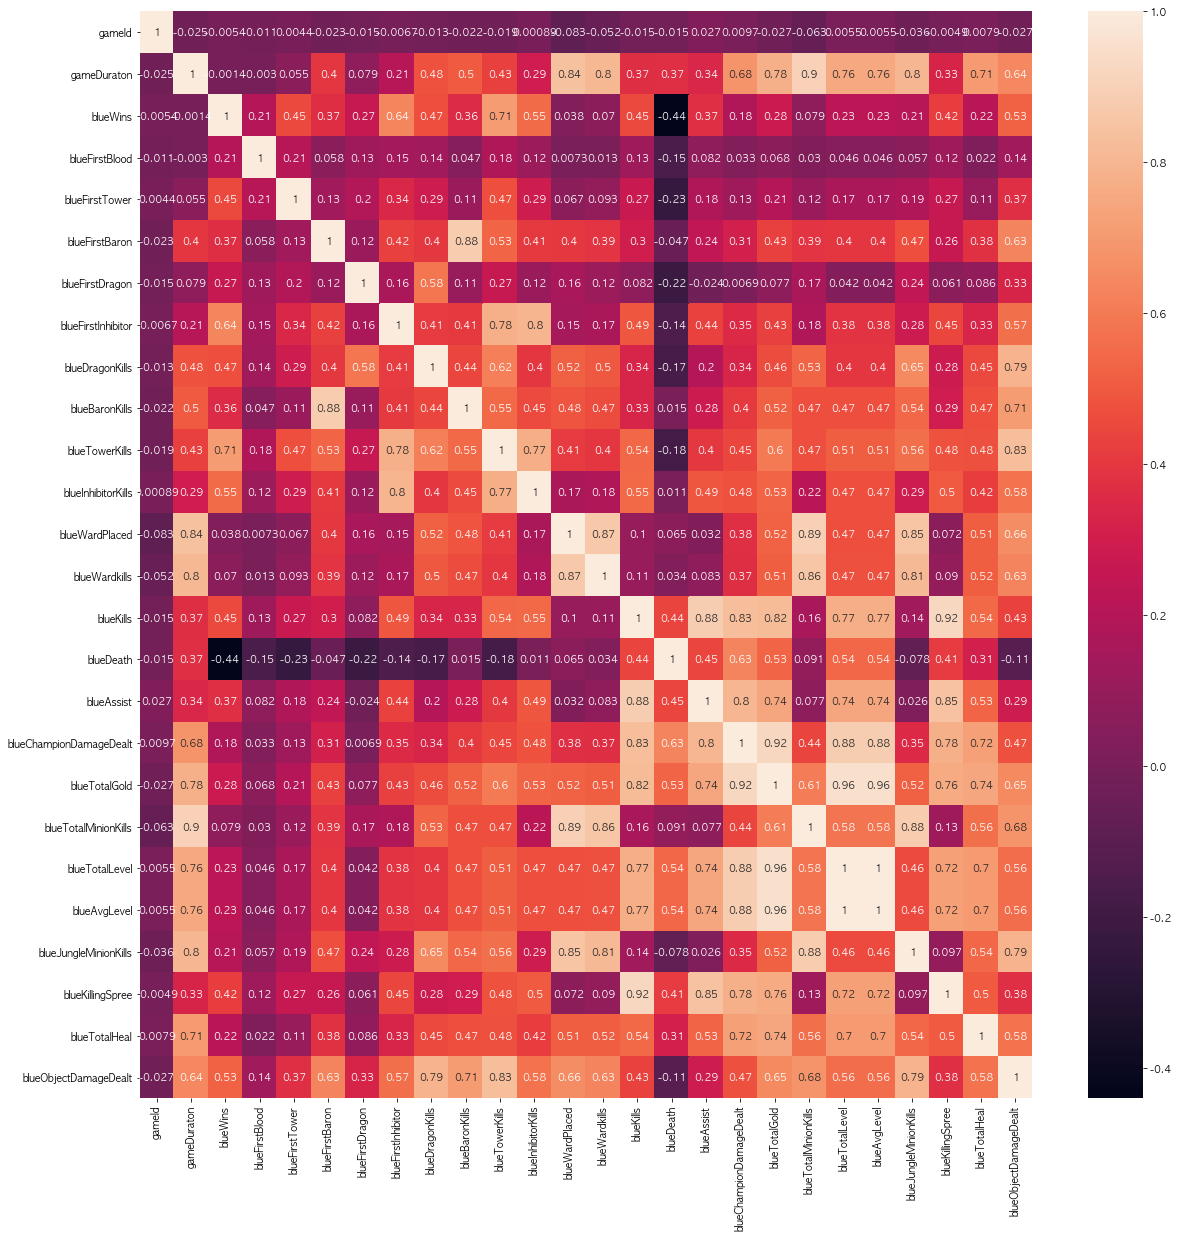

In [80]:
#상관계수 히트맵을 통해 중요변수 산출 (blue team)

plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)

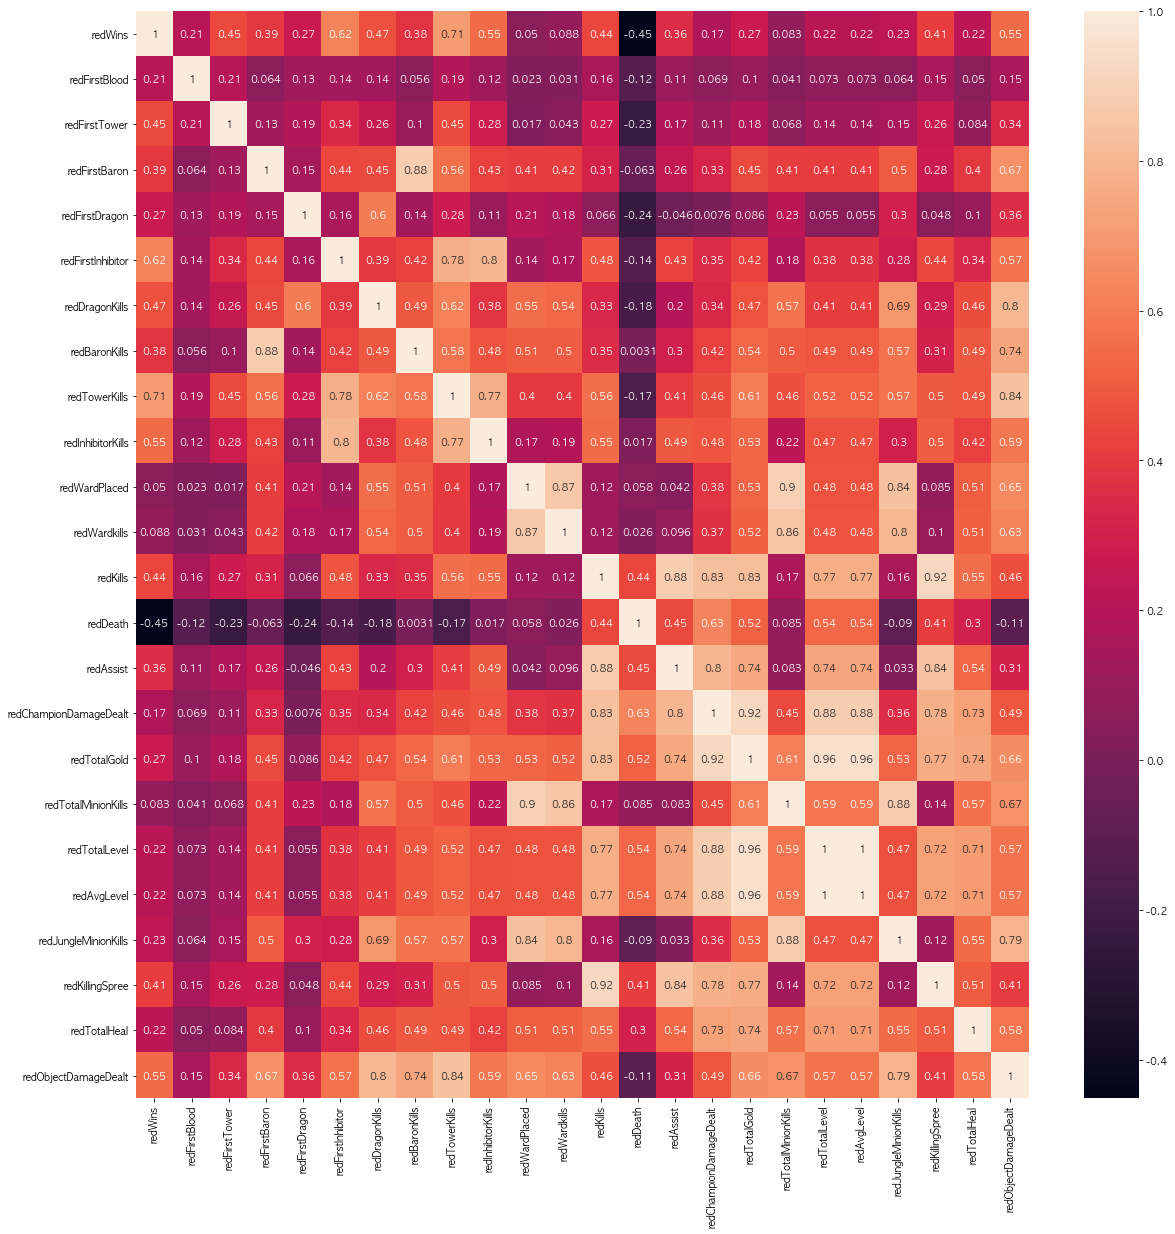

In [81]:
#상관계수 히트맵을 통해 중요변수 산출 (red team)
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), annot=True)

In [139]:
#전처리


#초단위를 분단위로 변환

df1.gameDuraton=round(df1.gameDuraton.apply(lambda x: x/60))  

([<matplotlib.axis.XTick at 0x7fda18adad90>],
 <a list of 1 Text xticklabel objects>)

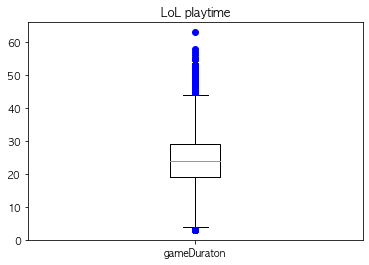

In [140]:
# 롤 플레이 시간의 범위는 0~3분 / 15분~max / 평균 25분)
plt.boxplot(df1.gameDuraton,sym='bo')
plt.title('LoL playtime')
plt.xticks([1], ['gameDuraton'])

In [141]:
#15분 미만의 게임은 (다시하기 게임시간 3분) 한 가지 경우의수 밖에없음.

df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueFirstTower>0)].index)    #15분 미만 첫 타워 킬이 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redFirstTower>0)].index)
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueFirstBaron>0)].index)    #15분 미만 첫 바론 킬이 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redFirstBaron>0)].index)
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueFirstDragon>0)].index)   #15분 미만 첫 드래곤 킬이 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redFirstDragon>0)].index)    
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueFirstInhibitor>0)].index) #15분 미만 첫 억제기 철거가 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redFirstInhibitor>0)].index)  
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueDragonKills>0)].index)    #15분 미만 드래곤 킬이 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redDragonKills>0)].index)
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueBaronKills>0)].index)     #15분 미만 바론 킬이 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redBaronKills>0)].index)      
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueTowerKills>0)].index)     #15분 미만 타워 철거가 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redTowerKills>0)].index)
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.blueInhibitorKills>0)].index) #15분 미만 억제기 철거가 있는경우 행 삭제
df1=df1.drop(df1[(df1.gameDuraton<13) & (df1.redInhibitorKills>0)].index)

In [142]:
#다시하기 / 15분미만 게임데이터 삭제

df1=df1[df1.gameDuraton>13]

In [143]:
#첼린저 경기에 와드 설치 개수가 10개 미만은 좋지 않은 데이터로 판단 해당 데이터 행 제거

df1=df1[df1.blueWardPlaced>10]

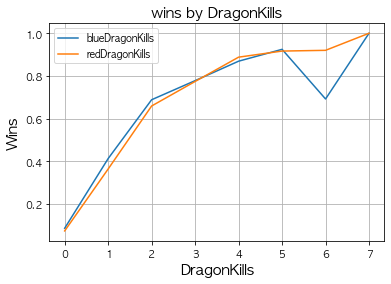

In [144]:
# 용 처치수와 승리의 선형관계 -> 왜 6용때 승리 비율이 하락할까 ? 방심해서 / 용 vs 바론

plt.plot(df1.groupby('blueDragonKills').mean()['blueWins'],label='blueDragonKills')
plt.plot(df1.groupby('redDragonKills').mean()['redWins'],label='redDragonKills')
plt.grid()

plt.title('wins by DragonKills', fontsize=15)
plt.xlabel('DragonKills', fontsize=15)
plt.ylabel('Wins', fontsize=15)

plt.legend(loc='upper left')

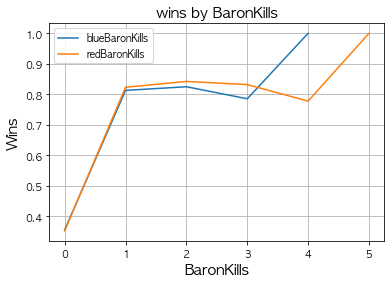

In [145]:
# 블루팀과 레드팀의 바론킬의 반비례 ->레드팀이 바론의 영향을 많이 받는다.

plt.plot(df1.groupby('blueBaronKills').mean()['blueWins'],label='blueBaronKills')
plt.plot(df1.groupby('redBaronKills').mean()['redWins'],label='redBaronKills')
plt.grid()

plt.title('wins by BaronKills', fontsize=15)
plt.xlabel('BaronKills', fontsize=15)
plt.ylabel('Wins', fontsize=15)

plt.legend(loc='upper left')

In [146]:
#blue팀, red팀으로 데이터셋 분할

df2=df1.iloc[:,26:52]  #red
df1=df1.iloc[:,:26]    #blue

In [147]:
#모델링


#블루팀 오브젝트 변수에 대한 승리 예측
from sklearn.model_selection import train_test_split
x = df1[['blueFirstDragon','blueFirstBaron', 'blueDragonKills', 'blueBaronKills']] 
y = df1[['blueWins']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [149]:
model = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x, y)
model2 = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0).fit(x, y)

/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [150]:
# 모델
y_pred = model.predict(x_test)
print(y_pred)
print(list(y_test))

[1 0 1 ... 0 0 0]
['blueWins']


In [151]:
# 블루팀 오브젝트에 따른 승리 예측
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

정확도 : 0.7578120826878906


In [152]:
#레드팀 오브젝트 변수에 대한 승리 예측

x1 = df2[['redFirstDragon', 'redFirstBaron','redDragonKills', 'redBaronKills']] 
y1 = df2[['redWins']]
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.8, test_size=0.2)

In [153]:
model3 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(x1, y1)
model4 = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0).fit(x1, y1)

/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/Users/namwook-kang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [154]:
# 모델
y_pred1 = model4.predict(x_test)
print(y_pred1)
print(list(y_test))

[0 0 0 ... 1 0 0]
['redWins']


In [155]:
# 레드팀의 오브젝트 변수가 더 정확한 결과를 낸다
print('정확도 :', metrics.accuracy_score(y_test, y_pred1))

정확도 : 0.7683884407884194


In [116]:
#결론: 블루팀보다 레드팀의 오브젝트 획득 확률이 높기 때문에 오브젝트에 대한 승리 정확도가 높다
#-> 블루팀 / 레드팀 공정한 오브젝트 획득을 위한 변화 필요